<a href="https://colab.research.google.com/github/ChamikaRohan/Machine-Learning-based-Red-Wine-Quality-Prediction/blob/main/Red_Wine_Quality_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the libraries

In [92]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV,cross_val_score

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

#Loading Dataset

In [7]:
dataset = pd.read_csv('winequality-red.csv')

#Checking the dataset shape
print("Dataset shape: ", dataset.shape)

Dataset shape:  (1599, 12)


In [ ]:
#Checking data distribution

dataset.head()

In [ ]:
#Info about the dataset

dataset.info()

In [ ]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#Plotting Graphs for better insight to data distribution

##Target variable(Quality) distribution

<ipython-input-6-a7b9c0b494c0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='quality', data=dataset, kind='count', palette='dark')


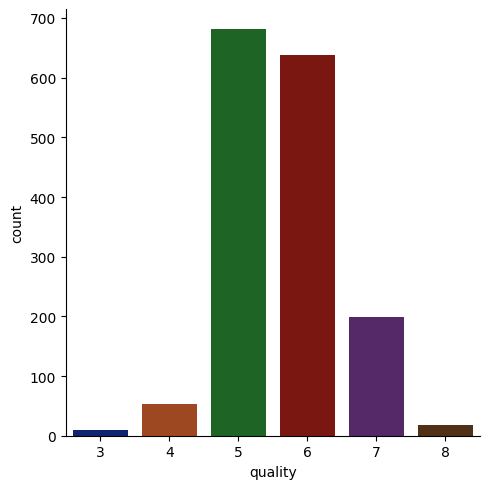

In [ ]:
sns.catplot(x='quality', data=dataset, kind='count', palette='dark')

##Fixed Acidity vs Quality

<ipython-input-7-df4322cd0c05>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y = 'fixed acidity', data = dataset, palette='dark')


<Axes: xlabel='quality', ylabel='fixed acidity'>

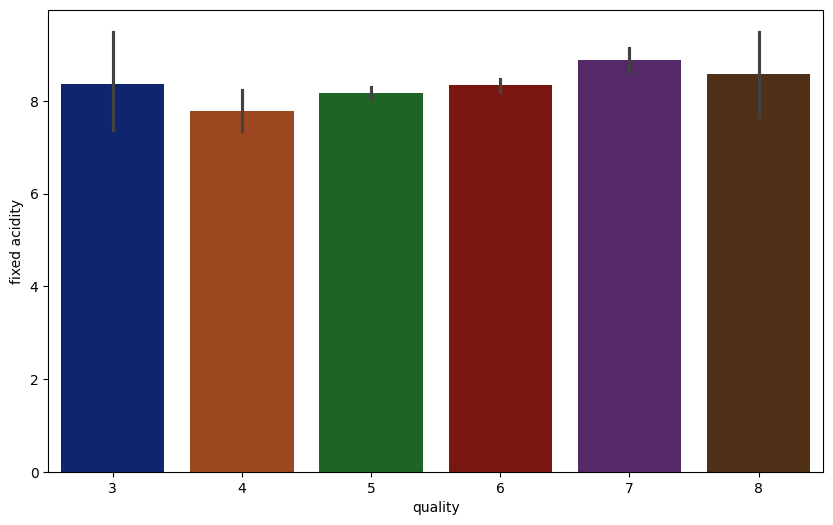

In [ ]:
# fied acidity vs Qualitya
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y = 'fixed acidity', data = dataset, palette='dark')

##Volatile Acidity vs Quality

<ipython-input-8-1b633aa91ee6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y = 'volatile acidity', data = dataset, palette='dark')


<Axes: xlabel='quality', ylabel='volatile acidity'>

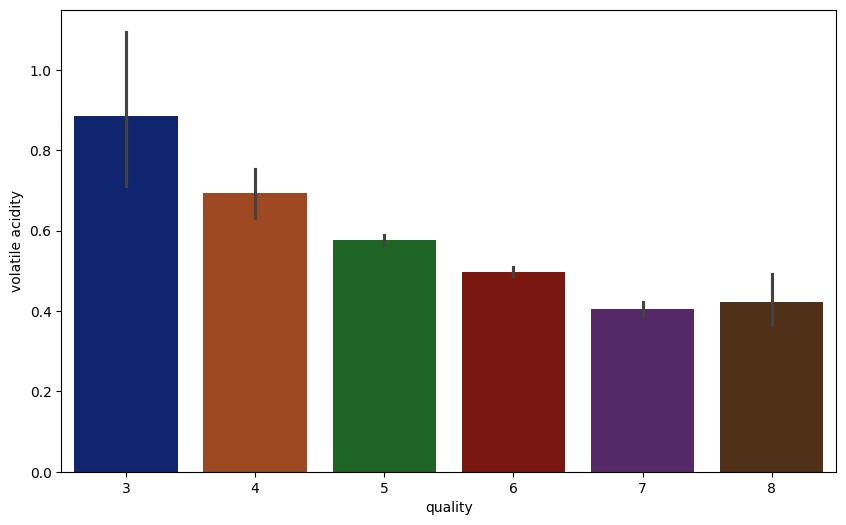

In [ ]:
# volatile acidity vs Quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y = 'volatile acidity', data = dataset, palette='dark')

##citric acid vs Quality

<ipython-input-9-af49fac6dc39>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y = 'citric acid', data = dataset, palette='dark')


<Axes: xlabel='quality', ylabel='citric acid'>

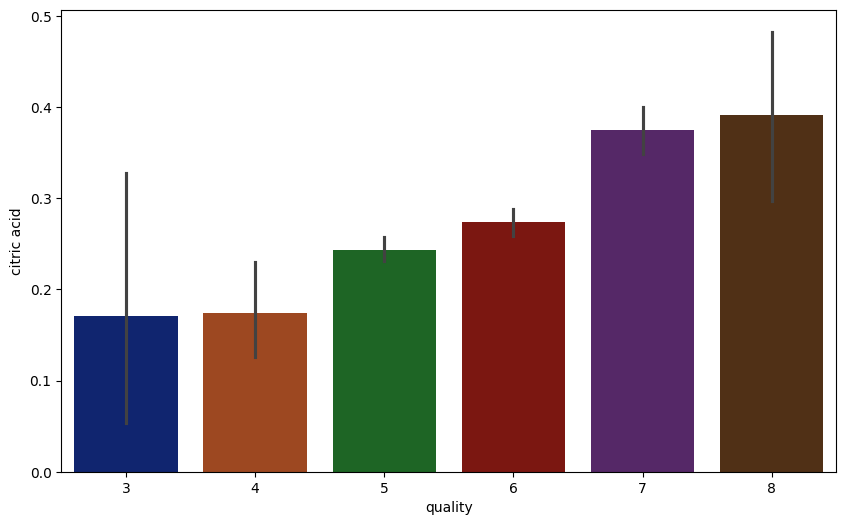

In [ ]:
# citric acid vs Quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y = 'citric acid', data = dataset, palette='dark')

##Residual Sugar vs Quality

<ipython-input-10-bb7829b37051>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y = 'residual sugar', data = dataset, palette='dark')


<Axes: xlabel='quality', ylabel='residual sugar'>

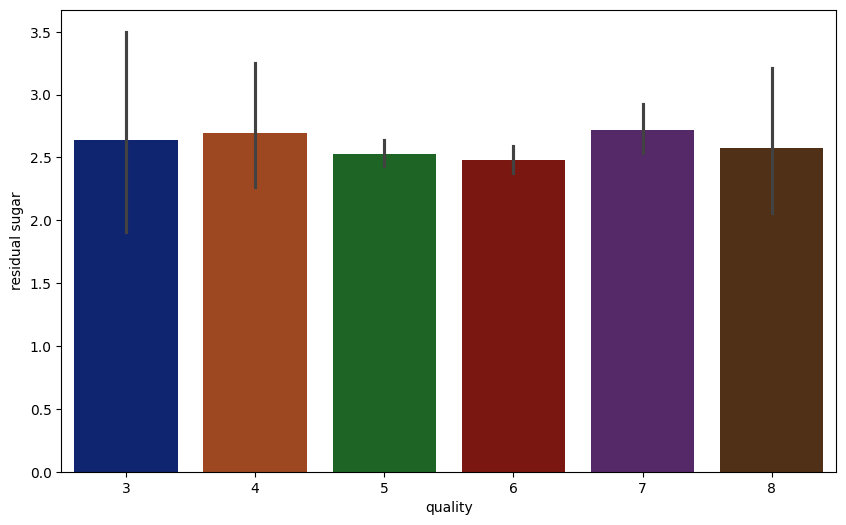

In [ ]:
# residual sugar vs Quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y = 'residual sugar', data = dataset, palette='dark')

##Chlorides vs Quality

<ipython-input-11-ea6020ab1f1d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y = 'chlorides', data = dataset, palette='dark')


<Axes: xlabel='quality', ylabel='chlorides'>

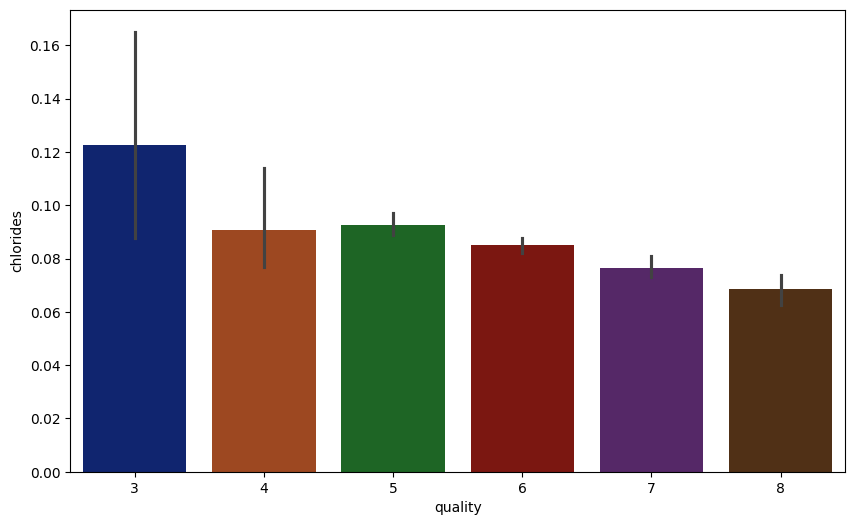

In [ ]:
# chlorides vs Quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y = 'chlorides', data = dataset, palette='dark')

##Free Sulfur Dioxide vs Quality

<ipython-input-12-088f0ebf4ac6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y = 'free sulfur dioxide', data = dataset, palette='dark')


<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

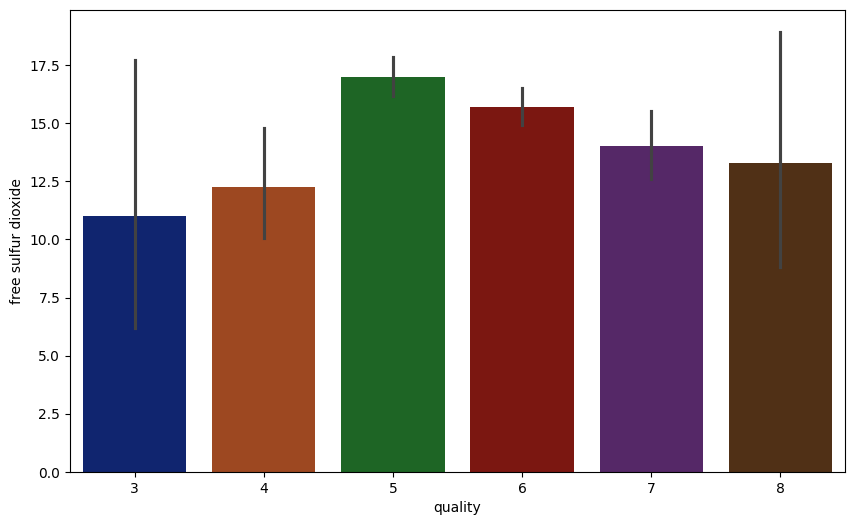

In [ ]:
# free sulfur dioxide vs Quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y = 'free sulfur dioxide', data = dataset, palette='dark')

##Total Sulfur Dioxide vs Quality

<ipython-input-13-84813381e88b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y = 'total sulfur dioxide', data = dataset, palette='dark')


<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

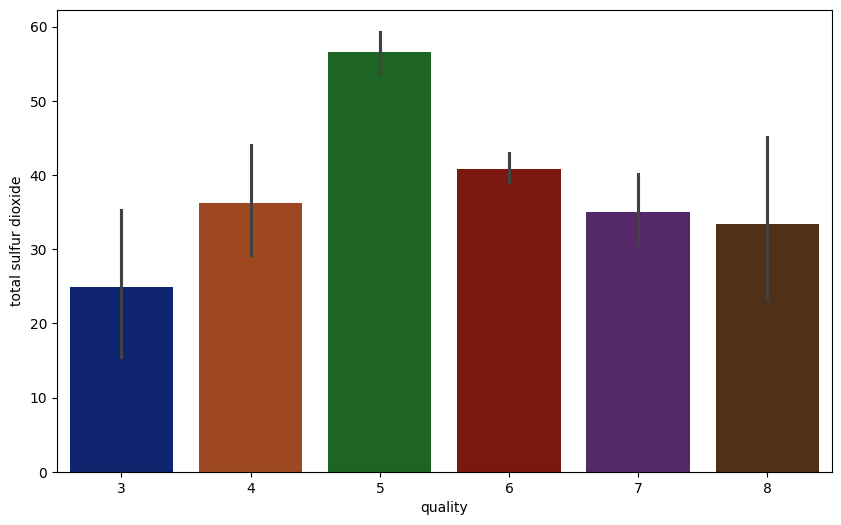

In [ ]:
#Total sulfur dioxide vs Quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y = 'total sulfur dioxide', data = dataset, palette='dark')

##Density vs Quality

<ipython-input-14-c255bd781156>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y = 'density', data = dataset, palette='dark')


<Axes: xlabel='quality', ylabel='density'>

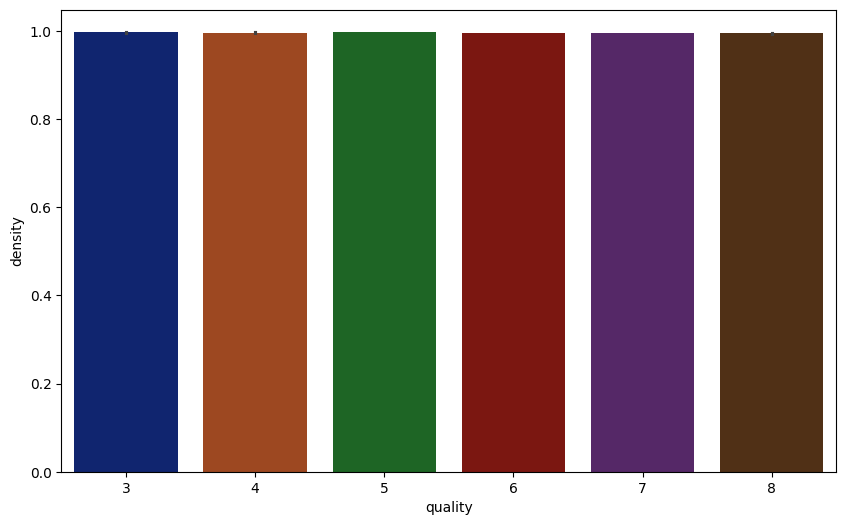

In [ ]:
#Density vs Quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y = 'density', data = dataset, palette='dark')

##pH vs Quality

<ipython-input-32-1b4867a9b9ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y = 'pH', data = dataset, palette='dark')


<Axes: xlabel='quality', ylabel='pH'>

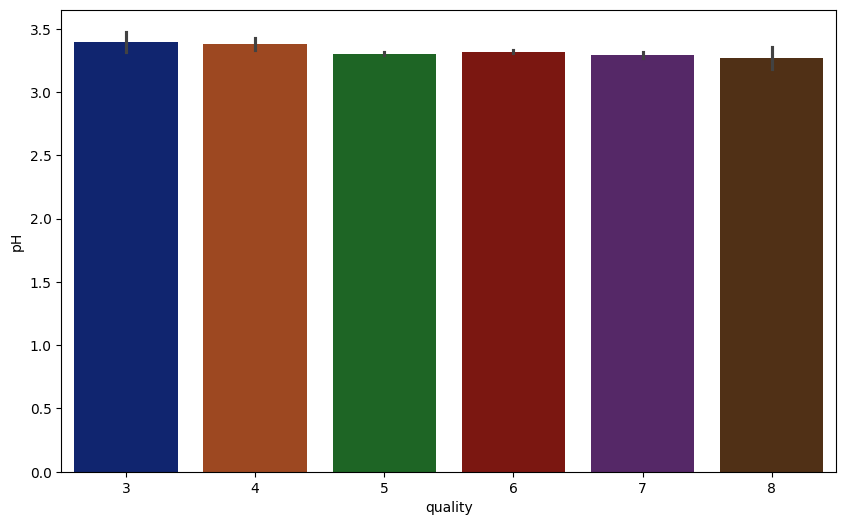

In [ ]:
#pH vs Quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y = 'pH', data = dataset, palette='dark')

##Sulphates vs Quality              

<ipython-input-35-e40d73d6fdde>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y = 'sulphates', data = dataset, palette='dark')


<Axes: xlabel='quality', ylabel='sulphates'>

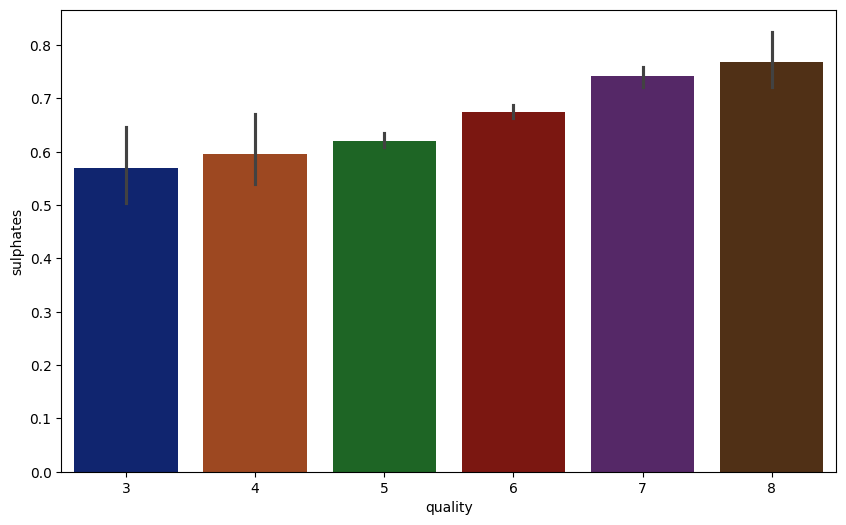

In [ ]:
#Sulphate vs Quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y = 'sulphates', data = dataset, palette='dark')

##Alcohol vs Quality              

<ipython-input-36-45f0c2ce5023>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y = 'alcohol', data = dataset, palette='dark')


<Axes: xlabel='quality', ylabel='alcohol'>

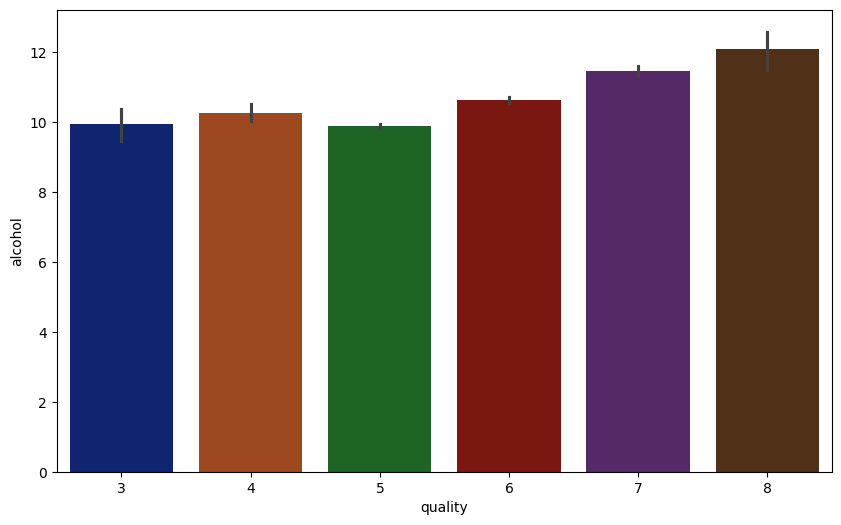

In [ ]:
#Alcohol vs Quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality', y = 'alcohol', data = dataset, palette='dark')

In [ ]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Correlation Matrix

###Correlation Matrix Generation

In [ ]:
corr = dataset.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


###Correlation Matrix as Heatmap

<Axes: >

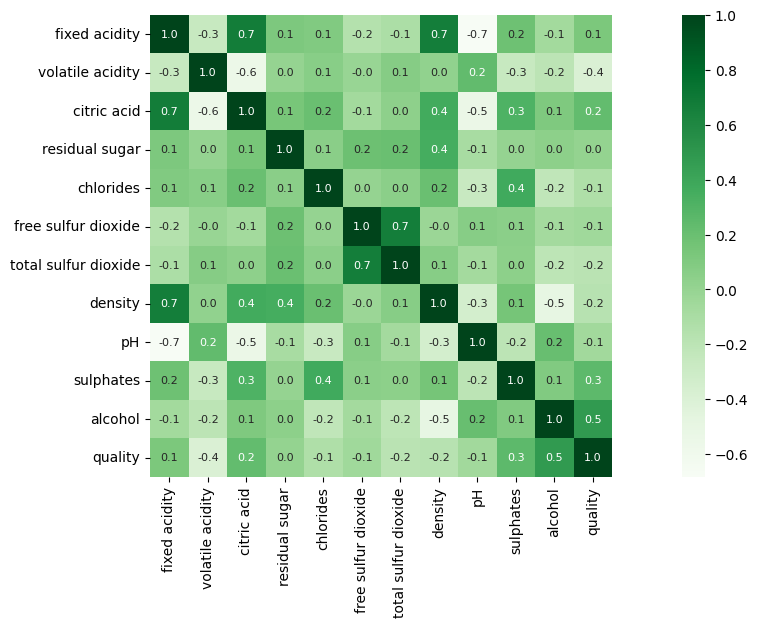

In [ ]:
plt.figure(figsize=(18,6))
sns.heatmap(corr, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Greens')

##Box-plots

NameError: name 'dataset' is not defined

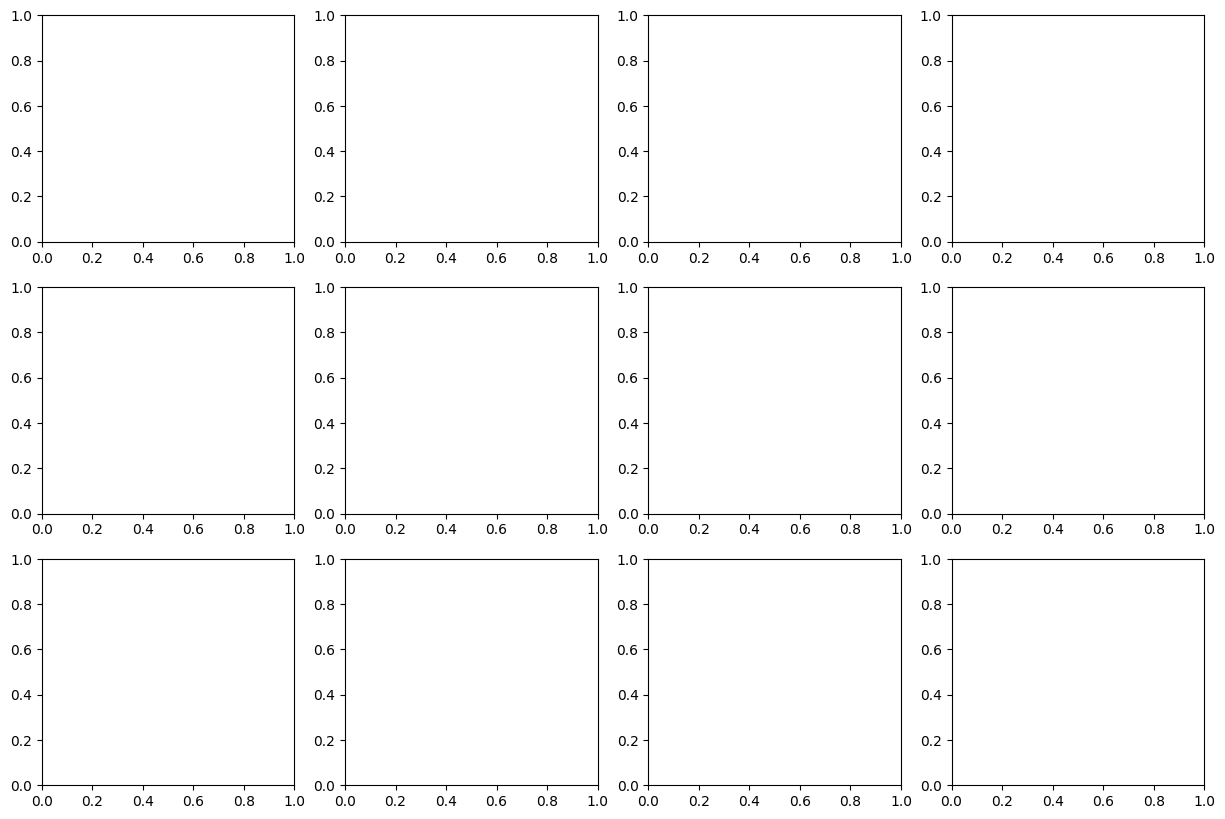

In [4]:
# Create a grid of subplots for each feature
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a boxplot
for i, col in enumerate(dataset.columns):
    sns.boxplot(x=dataset[col], ax=axes[i], palette='Set2')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('Values')

# Adjust layout and display
plt.tight_layout()
plt.show()

##Standard Normal Distribution Plots

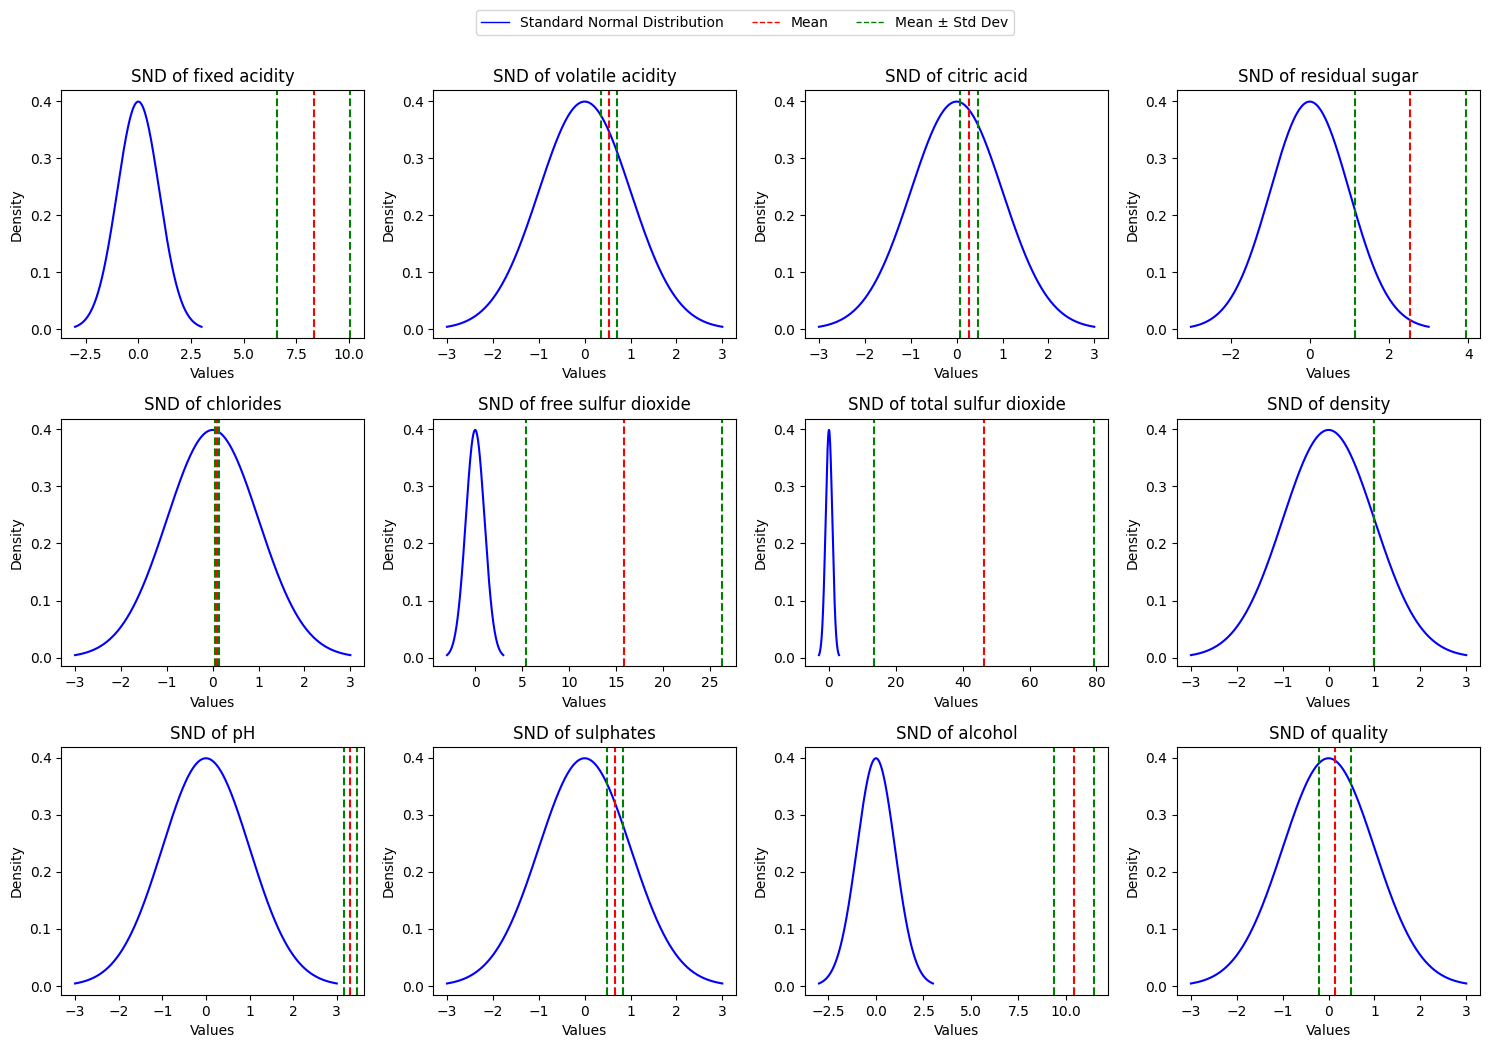

In [ ]:
# Create a figure and axes for each feature
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

# Generate x-values for the standard normal distribution
x = np.linspace(-3, 3, 1000)

# Create a single legend for all plots
legend_labels = ['Standard Normal Distribution', 'Mean', 'Mean ± Std Dev']
handles = [plt.Line2D([0], [0], color='blue', linewidth=1, linestyle='-'),
           plt.Line2D([0], [0], color='red', linewidth=1, linestyle='--'),
           plt.Line2D([0], [0], color='green', linewidth=1, linestyle='--')]
fig.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)

# Iterate through each feature and plot the standard normal distribution
for i, (col, ax) in enumerate(zip(dataset.columns, axes)):
    # Calculate mean and standard deviation of the feature
    mean = dataset[col].mean()
    std = dataset[col].std()

    # Plot the standard normal distribution curve
    ax.plot(x, norm.pdf(x, 0, 1), color='blue')

    # Highlight the feature's distribution (mean and std)
    ax.axvline(mean, color='red', linestyle='--')
    ax.axvline(mean - std, color='green', linestyle='--')
    ax.axvline(mean + std, color='green', linestyle='--')

    # Title and labels
    ax.set_title(f'SND of {col}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Density')

# Adjust layout and display
plt.tight_layout()
plt.show()


#Pre-processing data

##Handling Missing Values

In [8]:
#Check for missing values in each column
missing_values = dataset.isnull().sum()

#Print the number of missing values in each column
print("Missing values in each column: \n")
print(missing_values)

#Total missing values in the dataset
total_missing = missing_values.sum()
print("\nTotal Missing Values in the Dataset:", total_missing)

Missing values in each column: 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Total Missing Values in the Dataset: 0


##Handling Duplicate values

In [9]:
# Check for duplicate rows
duplicates = dataset[dataset.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free 

##Categorical target variable encoding

In [10]:
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
#classifying wine qulaity as good or bad using target variable
#'Bad' or 0 if quality < 6.5
#'Good' or 1 if quality >= 6.5

dataset['quality' ]= dataset['quality'].apply(lambda x:1 if x>6.5 else 0)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


<ipython-input-12-6d8563010287>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='quality', data=dataset, kind='count', palette='dark')


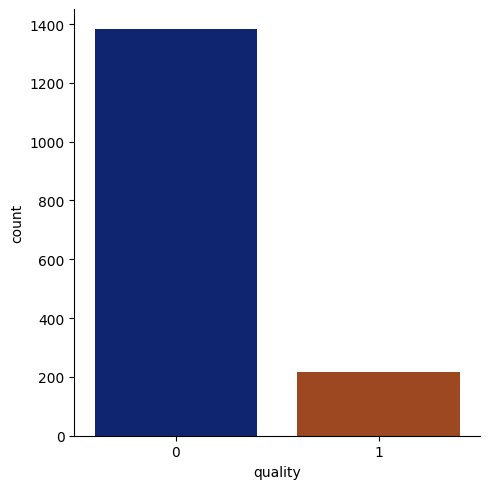

In [12]:
print(dataset['quality'].value_counts())

sns.catplot(x='quality', data=dataset, kind='count', palette='dark')

##Handling Outliers

In [14]:
#Add a code

##Seperate the dependent and independent varibles

In [13]:
x = dataset.drop('quality',axis=1)
y = dataset['quality']

In [15]:
#Now let's plot the x
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [16]:
#Now let's plot the y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

##Spliting into train and test sets

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

In [18]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (1279, 11)
x_test shape:  (320, 11)
y_train shape:  (1279,)
y_test shape:  (320,)


##Applying standard scaling

In [19]:
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [20]:
#Cheking x_train after appplied standard scaller
x_train

array([[-0.28449536,  0.15999956, -0.39272797, ...,  0.12323497,
        -0.67941175, -0.85342071],
       [-0.75151871,  0.27197736, -0.75566083, ...,  0.83235268,
        -1.02987259,  0.09054656],
       [ 0.64955133, -0.67983396,  1.11085101, ...,  0.18770022,
         0.78084171,  1.69529092],
       ...,
       [ 1.87548762, -1.96757868,  1.26639366, ..., -0.19909126,
         1.83222421, -0.28704035],
       [-0.16773952,  0.21598846, -0.18533777, ..., -0.32802175,
        -0.50418134, -1.04221416],
       [ 1.87548762, -0.62384506,  1.11085101, ..., -1.42393094,
        -0.73782189,  0.5625302 ]])

In [21]:
#Cheking x_test after appplied standard scaller
x_test

array([[ 1.16851738, -1.13098755,  0.9872956 , ..., -0.34421334,
         1.2003065 ,  0.18557189],
       [-0.40670651,  0.31456379, -0.40799913, ..., -1.00576451,
        -0.77417359, -0.64345663],
       [-0.35238845,  0.03657314, -0.20867131, ...,  0.78042364,
        -0.09544606, -1.38037087],
       ...,
       [-1.2214775 ,  1.03733945, -0.70699085, ...,  1.50812993,
        -0.40395857,  1.29094325],
       [-0.13511619, -1.01979129,  0.48897605, ...,  0.05271736,
         1.3237115 ,  1.75151465],
       [-0.02648006,  2.89987675, -0.70699085, ...,  0.38349294,
        -1.0826861 , -0.55134235]])

#Creating Machine Learning Algorithms

##Random Forest Classifier

In [22]:
#Creating Random Forest Classifier Instance
random_forest_classifier = RandomForestClassifier(n_estimators=100)

In [23]:
random_forest_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [46]:
RF_train_prediction = random_forest_classifier.predict(x_train)
RF_train_accuracy = accuracy_score(RF_train_prediction, y_train)
print('Train Data Accuracy : ', RF_train_accuracy)

Train Data Accuracy :  1.0


In [47]:
RF_test_prediction = random_forest_classifier.predict(x_test)
RF_test_accuracy = accuracy_score(RF_test_prediction, y_test)
print('Test Data Accuracy : ', RF_test_accuracy)

Test Data Accuracy :  0.903125


##Support vector Machine (SVC)

In [26]:
#Creating Random Support vector Classifier Instance
support_vector_classifier = SVC()

In [27]:
support_vector_classifier.fit(x_train, y_train)

SVC()

In [49]:
SVM_train_prediction = support_vector_classifier.predict(x_train)
SVM_train_accuracy = accuracy_score(SVM_train_prediction, y_train)
print('Train Data Accuracy : ', SVM_train_accuracy)

Train Data Accuracy :  0.8944487881157154


In [53]:
SVM_test_prediction = support_vector_classifier.predict(x_test)
SVM_test_accuracy = accuracy_score(SVM_test_prediction, y_test)
print('Test Data Accuracy : ', SVM_test_accuracy)

Test Data Accuracy :  0.896875


#Tuning Machine Learning algorithm

##Random Forest Classifier

In [55]:
rf_eval=cross_val_score(estimator=random_forest_classifier,X=x_train,y=y_train,cv=10)
rf_eval.mean()

0.9069758858267717

##Support vector Machine (SVC)

In [56]:
param={
        'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
        'kernel':['linear','rbf'],
        'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
      }

grid_svc =GridSearchCV(support_vector_classifier,param_grid=param,scoring='accuracy',cv=10)

In [57]:
grid_svc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [58]:
print("Best parameters for SVC:",grid_svc.best_params_)

Best parameters for SVC: {'C': 1.2, 'gamma': 1.3, 'kernel': 'rbf'}


In [59]:
#Creating Random Support vector Classifier Instance
tuned_support_vector_classifier = SVC(C=1.2,gamma=1.3,kernel='rbf')

In [60]:
tuned_support_vector_classifier.fit(x_train, y_train)

SVC(C=1.2, gamma=1.3)

In [61]:
new_x_train_prediction = tuned_support_vector_classifier.predict(x_train)
new_train_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Train Data Accuracy : ', new_train_data_accuracy)

Train Data Accuracy :  0.8944487881157154


#Evaluation Metrics

##Confusion Metrix

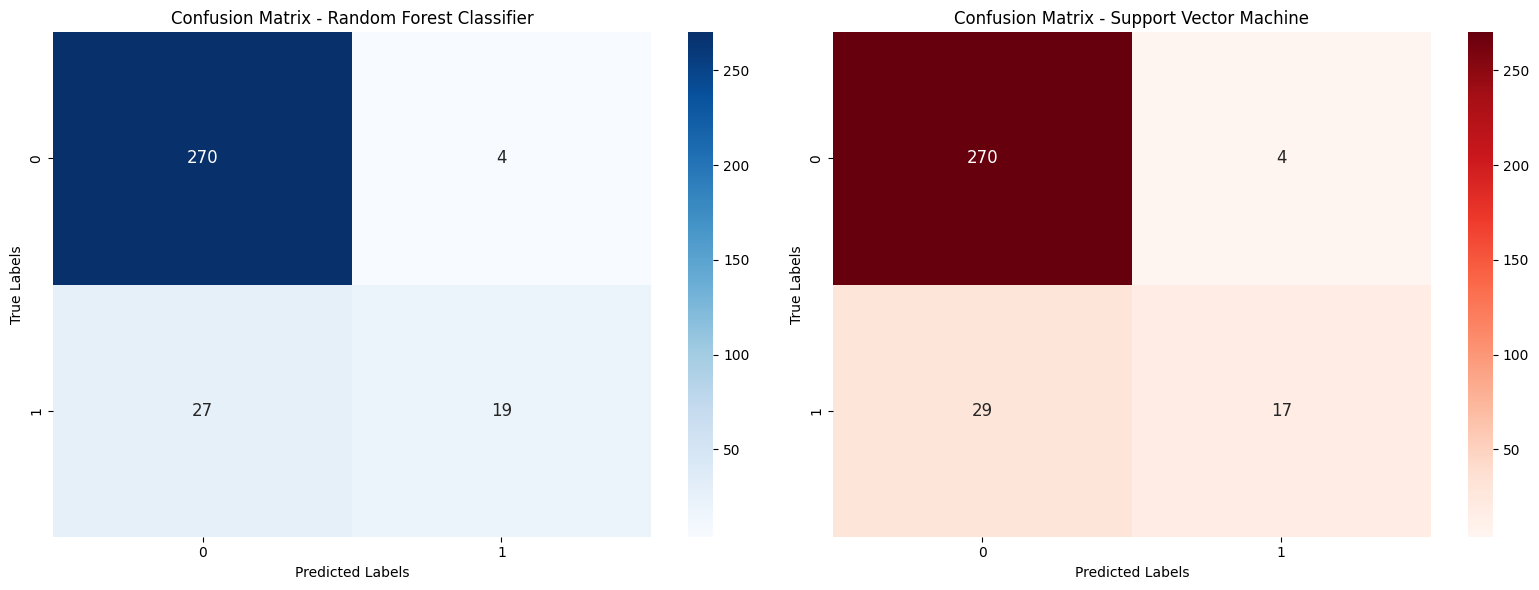

In [67]:
# Confusion matrix for Random Forest
conf_matrix_RF = confusion_matrix(y_test, RF_test_prediction)

# Confusion matrix for Support Vector Machine
conf_matrix_SVM = confusion_matrix(y_test, SVM_test_prediction)

# Create subplots for both confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot confusion matrix for Random Forest
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='Blues', annot_kws={"fontsize":12}, ax=axes[0])
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')
axes[0].set_title('Confusion Matrix - Random Forest Classifier')

# Plot confusion matrix for Support Vector Machine
sns.heatmap(conf_matrix_SVM, annot=True, fmt='d', cmap='Reds', annot_kws={"fontsize":12}, ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Confusion Matrix - Support Vector Machine')

plt.tight_layout()
plt.show()


##Accuracy

In [71]:
# Accuracy for Random Forest
accuracy_RF = accuracy_score(y_test, RF_test_prediction)
print("Accuracy - Random Forest:", accuracy_RF)

# Accuracy for Support Vector Machine
accuracy_SVM = accuracy_score(y_test, SVM_test_prediction)
print("Accuracy - Support Vector Machine:", accuracy_SVM)


Accuracy - Random Forest: 0.903125
Accuracy - Support Vector Machine: 0.896875


## Precision & Recall

In [79]:
# Precision for Random Forest
precision_RF = precision_score(y_test, RF_test_prediction)
print("Precision - Random Forest:", precision_RF)

# Precision for Support Vector Machine
precision_SVM = precision_score(y_test, SVM_test_prediction)
print("Precision - Support Vector Machine:", precision_SVM, "\n")

# Recall for Random Forest
recall_RF = recall_score(y_test, RF_test_prediction)
print("Recall - Random Forest:", recall_RF)

# Recall for Support Vector Machine
recall_SVM = recall_score(y_test, SVM_test_prediction)
print("Recall - Support Vector Machine:", recall_SVM)

Precision - Random Forest: 0.8260869565217391
Precision - Support Vector Machine: 0.8095238095238095 

Recall - Random Forest: 0.41304347826086957
Recall - Support Vector Machine: 0.3695652173913043


In [80]:
# Analysis
print("\n--- Analysis ---")
if precision_RF > precision_SVM:
    print("Random Forest has a higher precision.")
else:
    print("Support Vector Machine has a higher precision.")

if recall_RF > recall_SVM:
    print("Random Forest has a higher recall.")
else:
    print("Support Vector Machine has a higher recall.")


--- Analysis ---
Random Forest has a higher precision.
Random Forest has a higher recall.


##F1-Score

In [83]:
# F1-score for Random Forest
f1_RF = f1_score(y_test, RF_test_prediction)
print("F1-Score - Random Forest:", f1_RF)

# F1-score for Support Vector Machine
f1_SVM = f1_score(y_test, SVM_test_prediction)
print("F1-Score - Support Vector Machine:", f1_SVM)


F1-Score - Random Forest: 0.5507246376811594
F1-Score - Support Vector Machine: 0.5074626865671641


In [86]:
# Determine which model is better based on F1-score
print("\n--- Analysis ---")
if f1_RF > f1_SVM:
    print("Random Forest has a higher F1-Score and is better.")
elif f1_SVM > f1_RF:
    print("Support Vector Machine has a higher F1-Score and is better.")
else:
    print("Both models have the same F1-Score.")


--- Analysis ---
Random Forest has a higher F1-Score and is better.


##AU-ROC

In [93]:
# AUROC for Random Forest
auroc_RF = roc_auc_score(y_test, RF_test_prediction)
print("AUROC - Random Forest:", auroc_RF)

# AUROC for Support Vector Machine
auroc_SVM = roc_auc_score(y_test, SVM_test_prediction)
print("AUROC - Support Vector Machine:", auroc_SVM)


AUROC - Random Forest: 0.6992224690574421
AUROC - Support Vector Machine: 0.6774833386226594


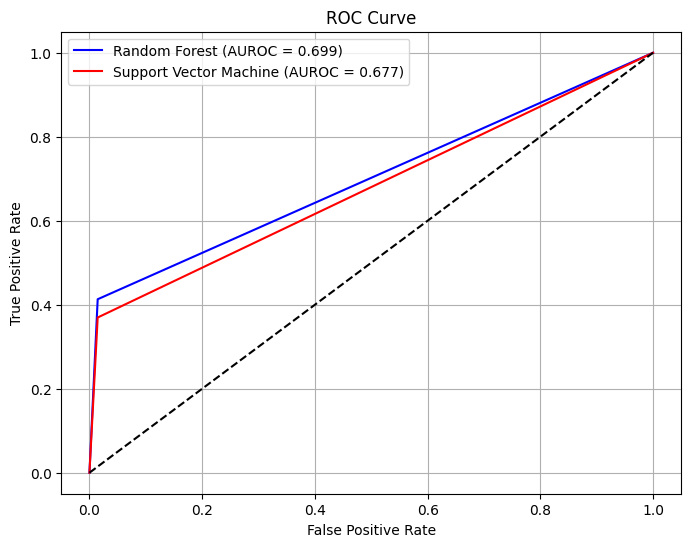

In [94]:
# Calculate ROC curve for Random Forest
fpr_RF, tpr_RF, _ = roc_curve(y_test, RF_test_prediction)

# Calculate ROC curve for Support Vector Machine
fpr_SVM, tpr_SVM, _ = roc_curve(y_test, SVM_test_prediction)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_RF, tpr_RF, label='Random Forest (AUROC = {:.3f})'.format(auroc_RF), color='blue')
plt.plot(fpr_SVM, tpr_SVM, label='Support Vector Machine (AUROC = {:.3f})'.format(auroc_SVM), color='red')

# Plot ROC curve for random guessing (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()